# EDA

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df_games = pd.read_parquet('datasets/dfgames.parquet')
df_reviews = pd.read_parquet('datasets/user_reviews.parquet')
df_items = pd.read_parquet('datasets/users_item.parquet')

## Analisis de df_games

In [48]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27710 entries, 0 to 27709
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   app_name                   27710 non-null  object 
 1   price                      27710 non-null  float32
 2   id                         27710 non-null  int32  
 3   developer                  27710 non-null  object 
 4   Accounting                 27710 non-null  int32  
 5   Action                     27710 non-null  int32  
 6   Adventure                  27710 non-null  int32  
 7   Animation &amp; Modeling   27710 non-null  int32  
 8   Audio Production           27710 non-null  int32  
 9   Casual                     27710 non-null  int32  
 10  Design &amp; Illustration  27710 non-null  int32  
 11  Early Access               27710 non-null  int32  
 12  Education                  27710 non-null  int32  
 13  Free to Play               27710 non-null  int

In [41]:
df_games['year'].describe()

count    27710.000000
mean      2014.863226
std          3.266610
min       1983.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: year, dtype: float64

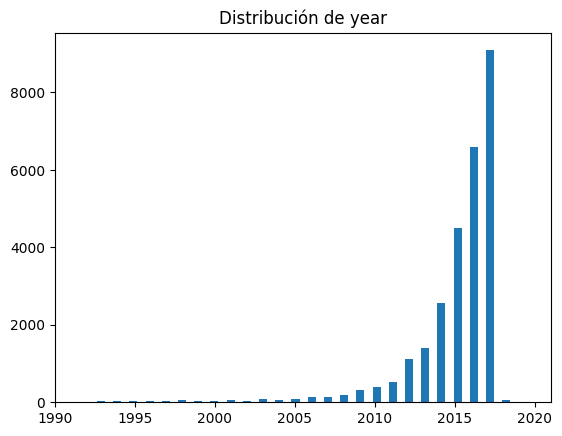

In [47]:
# Histograma de year
plt.hist(df_games['year'], bins=75)
plt.title('Distribución de year')
plt.xlim([1990, 2021])
plt.show()

Vemos en la grafica que la mayoria de los juegos fueron lanzados entre 2015 y 2018

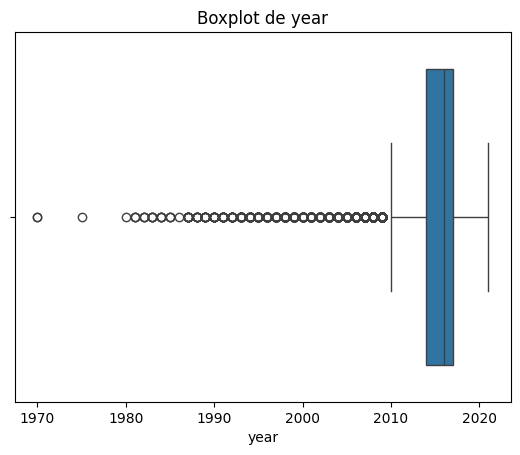

In [22]:
# Boxplot de year
sns.boxplot(x=df_games['year'])
plt.title('Boxplot de year')
plt.show()

In [49]:
generos = list(df_games.drop(columns=['app_name','price','id','developer','Accounting','year']).columns)

C:\Users\castr\AppData\Local\Temp\ipykernel_7340\4215553583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


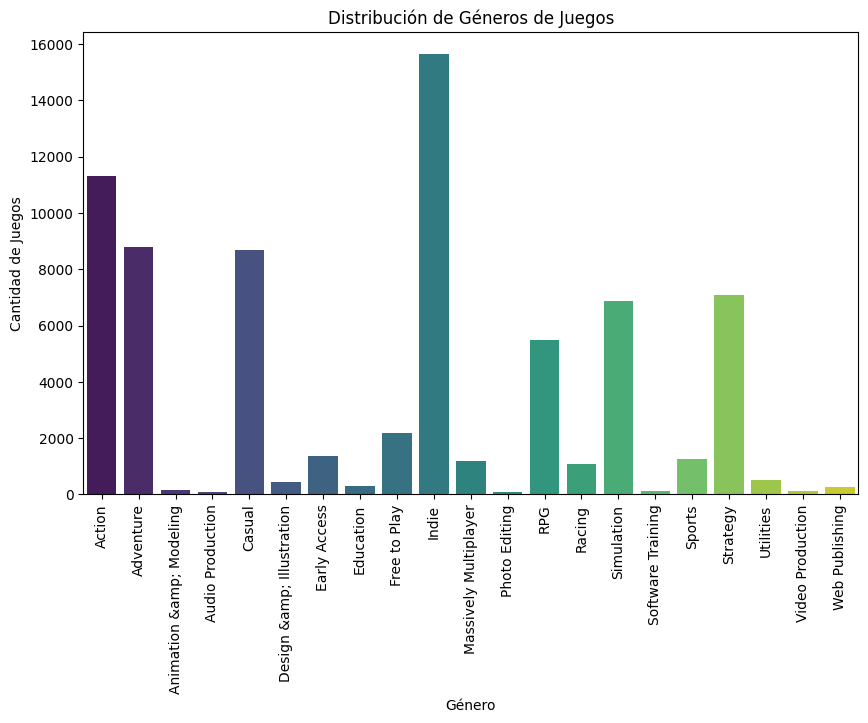

In [50]:
genre_counts = df_games[generos].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Configurar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Géneros de Juegos')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
# Mostrar el gráfico
plt.show()

## Análisis de df_reviews

In [27]:
df_reviews.describe(include='all')

,user_id,item_id,recommend,posted year,sentiment_analysis
count,49186,49186.000000,49186,49186.000000,49186.000000
unique,22795,NaN,2,NaN,NaN
top,OfficialSenix,NaN,True,NaN,NaN
freq,20,NaN,44182,NaN,NaN
mean,NaN,155534.957061,NaN,2014.150205,1.407230
std,NaN,124549.146739,NaN,0.841830,0.634208
min,NaN,10.000000,NaN,2010.000000,0.000000
25%,NaN,6900.000000,NaN,2014.000000,1.000000
50%,NaN,209090.000000,NaN,2014.000000,1.000000
75%,NaN,248515.000000,NaN,2015.000000,2.000000


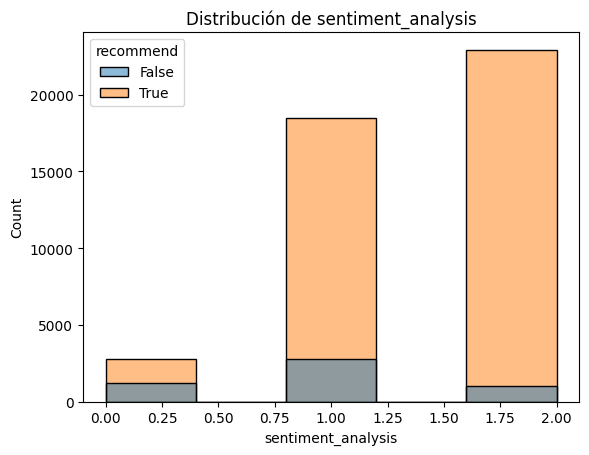

In [57]:
# Histograma de sentiment_analysis
sns.histplot(data=df_reviews, x='sentiment_analysis', hue='recommend', bins=5)
plt.title('Distribución de sentiment_analysis')
plt.show()

podemos apreciar que en las negativas gran porcentaje son falsas, en cambio en las demas se mantiene normal, con gran cantidad de sentimientos positivos y neutros

## Análisis de df_items

In [75]:
df_items.describe(include='all')

,user_id,item_id,item_name,playtime_forever
count,5153209,5.153209e+06,5153209,5.153209e+06
unique,70912,NaN,10947,NaN
top,phrostb,NaN,Dota 2 Test,NaN
freq,7762,NaN,49571,NaN
mean,NaN,1.784481e+05,NaN,9.914951e+02
std,NaN,1.318598e+05,NaN,5.418204e+03
min,NaN,1.000000e+01,NaN,0.000000e+00
25%,NaN,3.446000e+04,NaN,0.000000e+00
50%,NaN,2.144200e+05,NaN,3.400000e+01
75%,NaN,2.664300e+05,NaN,3.550000e+02


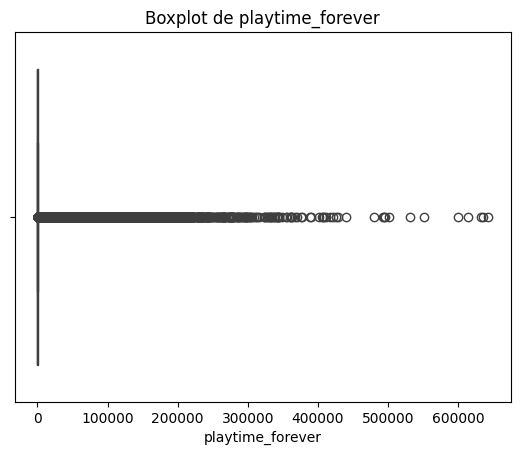

In [36]:
# Boxplot de playtime_forever
sns.boxplot(x=df_items['playtime_forever'])
plt.title('Boxplot de playtime_forever')
plt.show()

Hay valores atipicos de playtime_forever pero solo se hara un tratado si se encuentra un valor que supere la cantidad de minutos entre que salio el juego y la fecha actual.

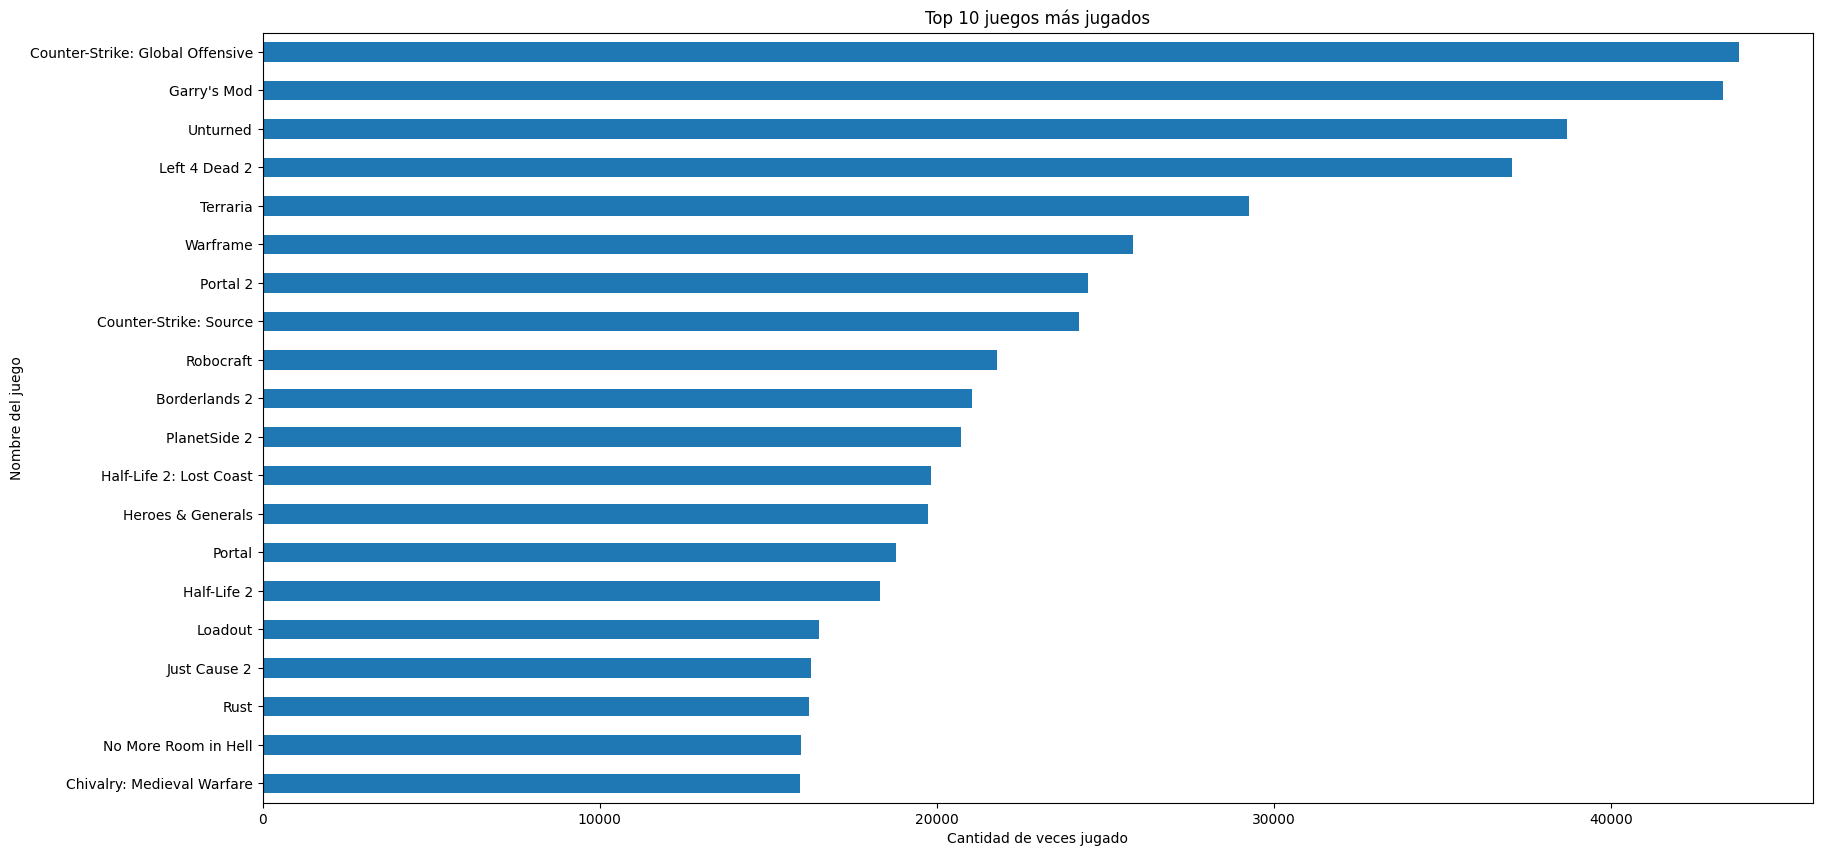

In [77]:
# Unir los dataframes para obtener los nombres de los juegos
df_merge = df_items.merge(df_games, left_on='item_id', right_on='id')

# Contar cuántas veces cada juego fue jugado
game_counts = df_merge['app_name'].value_counts()

top_games = game_counts[:20]

plt.figure(figsize=(20,10))
top_games.plot(kind='barh')
plt.title('Top 10 juegos más jugados')
plt.xlabel('Cantidad de veces jugado')
plt.ylabel('Nombre del juego')
plt.gca().invert_yaxis() 
plt.show()

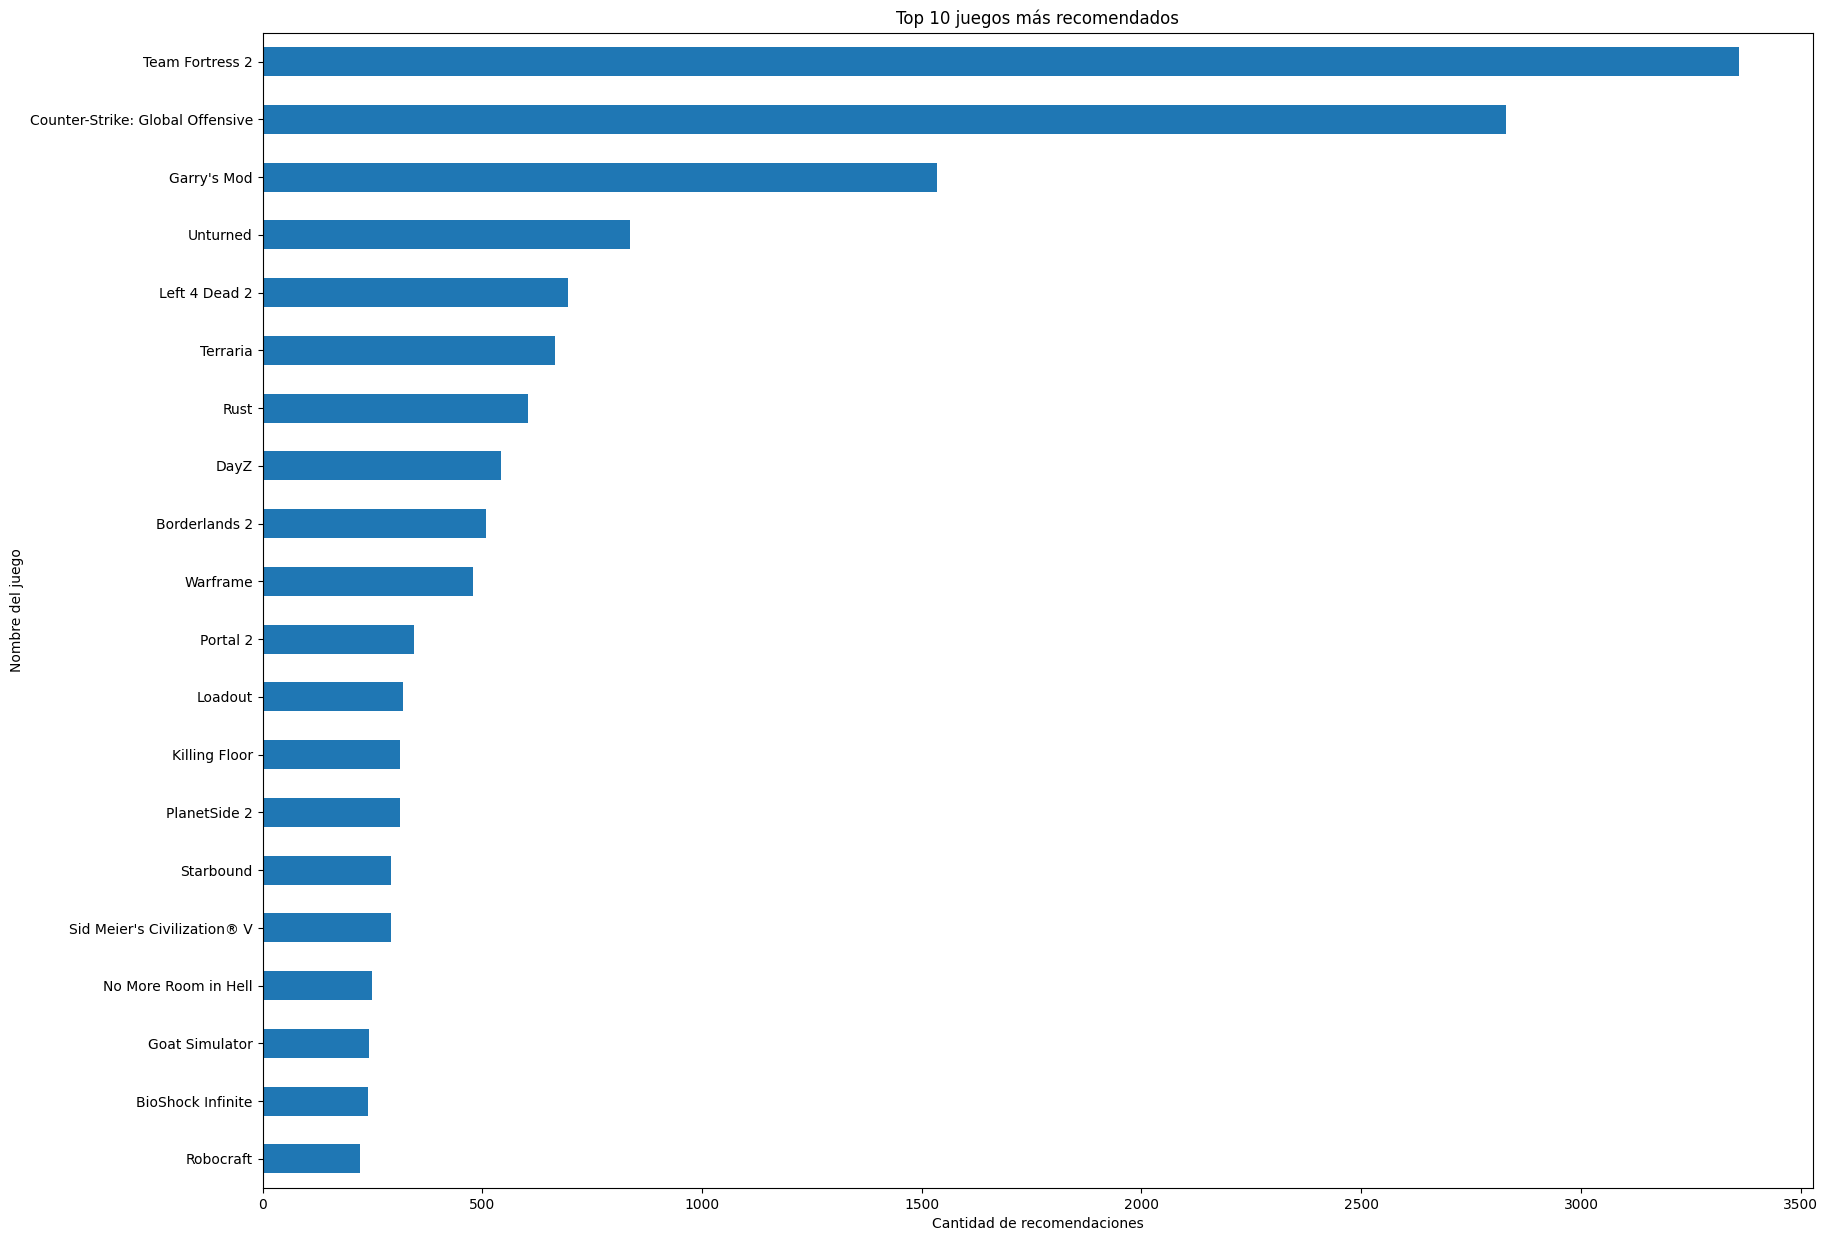

In [79]:
# Filtrar las reseñas que son recomendaciones
recommended_reviews = df_reviews[df_reviews['recommend'] == True]

# Unir los dataframes para obtener los nombres de los juegos
recommended_merge = recommended_reviews.merge(df_games, left_on='item_id', right_on='id')

# Contar cuántas veces cada juego fue recomendado
recommend_counts = recommended_merge['app_name'].value_counts()

top_recommended_games = recommend_counts[:20]

plt.figure(figsize=(20,15))
top_recommended_games.plot(kind='barh')
plt.title('Top 10 juegos más recomendados')
plt.xlabel('Cantidad de recomendaciones')
plt.ylabel('Nombre del juego')
plt.gca().invert_yaxis()
plt.show()

A partir de estas ultimas dos graficas concluimos que los juegos mas jugados suelen ser los mas recomendados con excepcion de Team Fortress 2